# Evaluating the Model

This notebook will contain code on choosing and evaluating the model, but there are a few things we need to do before we do this, namely, separating the data into training and test sets.

## Splitting the Data

The following code will split the data into training and test sets for the model. The test set will be 20% of the data, while the training set will be the remaining 80%.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

cleaned_data_folder = "../data/cleaned/"
data = pd.read_csv(cleaned_data_folder + 'all_songs_data_cleaned.csv')
X = data.drop(columns=['Year'])
y = data['Year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

This isn't strictly necessary, but it may be good to visualize the test and training sets, so I will save them as .csv's.

In [2]:
train_set = pd.concat([X_train, y_train], axis=1)
train_set.to_csv(cleaned_data_folder + 'train_set.csv', index=False)

test_set = pd.concat([X_test, y_test], axis=1)
test_set.to_csv(cleaned_data_folder + 'test_set.csv', index=False)

## Training the Model

We will start with training a Linear Regression model. The below code will do this.

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

And we will see how the model performed using MAE, MSE and R2.

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

def calculate_accuracy(y_true, y_pred):
    accuracy = (y_true == y_pred).mean() * 100 
    return accuracy

def calculate_accuracy_within_threshold(y_true, y_pred, threshold):
    correct_within_threshold = abs(y_true - y_pred) <= threshold
    accuracy_within_threshold = correct_within_threshold.mean() * 100
    return accuracy_within_threshold
    
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# eval training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# eval test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

accuracy_test = calculate_accuracy(y_test, y_test_pred)
accuracy_within_5_test = calculate_accuracy_within_threshold(y_test, y_test_pred, 5)
accuracy_within_10_test = calculate_accuracy_within_threshold(y_test, y_test_pred, 10)

# eval metrics
print("Training Metrics:")
print(f"  MAE: {train_mae:.2f}")
print(f"  MSE: {train_mse:.2f}")
print(f"  R2: {train_r2:.2f}\n")

print("Testing Metrics:")
print(f"  MAE: {test_mae:.2f}")
print(f"  MSE: {test_mse:.2f}")
print(f"  R2: {test_r2:.2f}\n")

print("Accuracy Metrics:")
print(f"Accuracy (Exact Match): {accuracy_test:.2f}%")
print(f"Accuracy within 5 years: {accuracy_within_5_test:.2f}%")
print(f"Accuracy within 10 years: {accuracy_within_10_test:.2f}%")

print("\nOverfitting/Underfitting Analysis:")
if train_r2 > test_r2 + 0.1:
    print("The model is overfitting (better performance on training data).")
elif train_r2 < test_r2 - 0.1:
    print("The model is underfitting (poor performance on both training and test data).")
else:
    print("The model has a good balance between training and test performance.")

Training Metrics:
  MAE: 12.99
  MSE: 249.98
  R2: 0.28

Testing Metrics:
  MAE: 12.94
  MSE: 250.71
  R2: 0.27

Accuracy Metrics:
Accuracy (Exact Match): 0.00%
Accuracy within 5 years: 24.05%
Accuracy within 10 years: 43.91%

Overfitting/Underfitting Analysis:
The model has a good balance between training and test performance.


The below will plot the model's performance by comparing actual vs. predicted values.

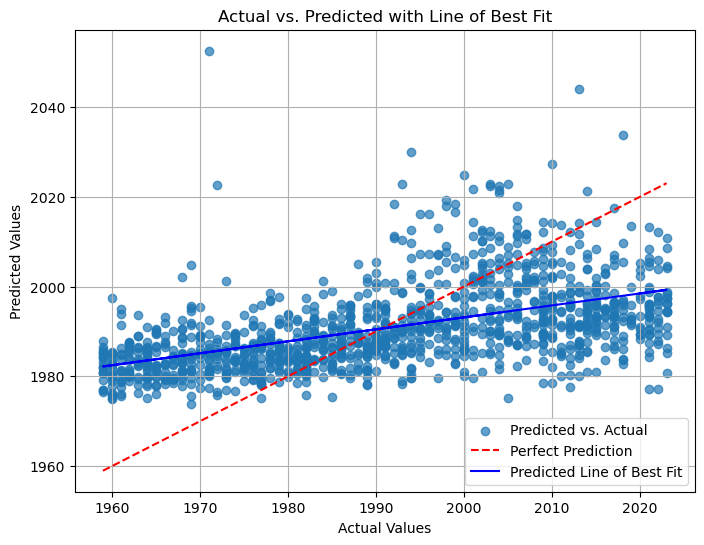

In [5]:
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Predicted vs. Actual")

# perfect prediction 1:1
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")

# line of best fit to compare to above line
y_test_array = y_test.to_numpy().reshape(-1, 1)
reg = LinearRegression().fit(y_test_array, y_test_pred)
best_fit = reg.predict(y_test_array)
plt.plot(y_test, best_fit, color='blue', label="Predicted Line of Best Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted with Line of Best Fit")
plt.legend()
plt.grid(True)
plt.show()

This isn't the best result. It is admittedly difficult to predict the Year of Release from features derived from the lyrics of a song, but there is room for improvement. With a MAE of 12.9, the average mistake distance is not very far. However, with a MSE of 250.9, when the model is wrong, it is __very__ wrong. Additionally, the R-squared is only 0.264, meaning the model only explains about 26.4% of the value of the Year. This could be due to the data itself, or due to the model, so we will attempt to use a more complex model next.

The following does the above, but with a Random Forest Regressor, hopefully capturing more complex patterns and improving accuracy.

Training Metrics:
  MAE: 4.11
  MSE: 28.08
  R2: 0.92

Testing Metrics:
  MAE: 11.02
  MSE: 201.33
  R2: 0.41

Accuracy Metrics:
Accuracy (Exact Match): 0.00%
Accuracy within 5 years: 30.10%
Accuracy within 10 years: 55.04%

Overfitting/Underfitting Analysis:
The model is overfitting (better performance on training data).


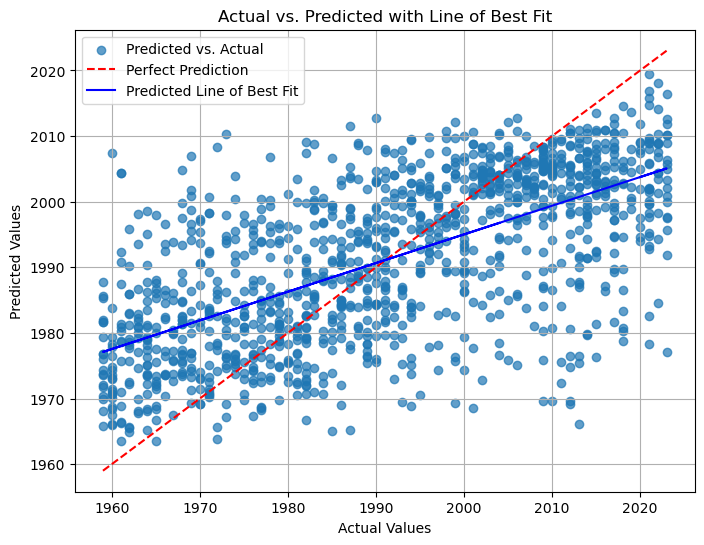

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=50, random_state=0)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# eval training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# eval test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

accuracy_test = calculate_accuracy(y_test, y_test_pred)
accuracy_within_5_test = calculate_accuracy_within_threshold(y_test, y_test_pred, 5)
accuracy_within_10_test = calculate_accuracy_within_threshold(y_test, y_test_pred, 10)

# eval metrics
print("Training Metrics:")
print(f"  MAE: {train_mae:.2f}")
print(f"  MSE: {train_mse:.2f}")
print(f"  R2: {train_r2:.2f}\n")

print("Testing Metrics:")
print(f"  MAE: {test_mae:.2f}")
print(f"  MSE: {test_mse:.2f}")
print(f"  R2: {test_r2:.2f}\n")

print("Accuracy Metrics:")
print(f"Accuracy (Exact Match): {accuracy_test:.2f}%")
print(f"Accuracy within 5 years: {accuracy_within_5_test:.2f}%")
print(f"Accuracy within 10 years: {accuracy_within_10_test:.2f}%")

print("\nOverfitting/Underfitting Analysis:")
if train_r2 > test_r2 + 0.1:
    print("The model is overfitting (better performance on training data).")
elif train_r2 < test_r2 - 0.1:
    print("The model is underfitting (poor performance on both training and test data).")
else:
    print("The model has a good balance between training and test performance.")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Predicted vs. Actual")

# perfect prediction 1:1
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")

# line of best fit to compare to above line
y_test_array = y_test.to_numpy().reshape(-1, 1)
reg = LinearRegression().fit(y_test_array, y_test_pred)
best_fit = reg.predict(y_test_array)
plt.plot(y_test, best_fit, color='blue', label="Predicted Line of Best Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted with Line of Best Fit")
plt.legend()
plt.grid(True)
plt.show()

Training Metrics:
  MAE: 10.38
  MSE: 167.49
  R2: 0.52

Testing Metrics:
  MAE: 11.00
  MSE: 193.51
  R2: 0.43

Accuracy Metrics:
Accuracy (Exact Match): 0.00%
Accuracy within 5 years: 29.30%
Accuracy within 10 years: 53.27%

Overfitting/Underfitting Analysis:
The model has a good balance between training and test performance.


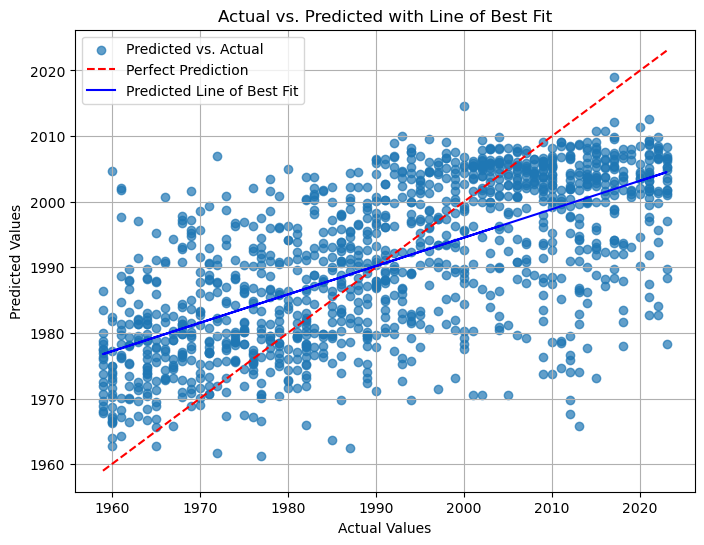

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

y_train_pred = gbr_model.predict(X_train)
y_test_pred = gbr_model.predict(X_test)

# eval training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# eval test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

accuracy_test = calculate_accuracy(y_test, y_test_pred)
accuracy_within_5_test = calculate_accuracy_within_threshold(y_test, y_test_pred, 5)
accuracy_within_10_test = calculate_accuracy_within_threshold(y_test, y_test_pred, 10)

# eval metrics
print("Training Metrics:")
print(f"  MAE: {train_mae:.2f}")
print(f"  MSE: {train_mse:.2f}")
print(f"  R2: {train_r2:.2f}\n")

print("Testing Metrics:")
print(f"  MAE: {test_mae:.2f}")
print(f"  MSE: {test_mse:.2f}")
print(f"  R2: {test_r2:.2f}\n")

print("Accuracy Metrics:")
print(f"Accuracy (Exact Match): {accuracy_test:.2f}%")
print(f"Accuracy within 5 years: {accuracy_within_5_test:.2f}%")
print(f"Accuracy within 10 years: {accuracy_within_10_test:.2f}%")

print("\nOverfitting/Underfitting Analysis:")
if train_r2 > test_r2 + 0.1:
    print("The model is overfitting (better performance on training data).")
elif train_r2 < test_r2 - 0.1:
    print("The model is underfitting (poor performance on both training and test data).")
else:
    print("The model has a good balance between training and test performance.")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Predicted vs. Actual")

# perfect prediction 1:1
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")

# line of best fit to compare to above line
y_test_array = y_test.to_numpy().reshape(-1, 1)
reg = LinearRegression().fit(y_test_array, y_test_pred)
best_fit = reg.predict(y_test_array)
plt.plot(y_test, best_fit, color='blue', label="Predicted Line of Best Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted with Line of Best Fit")
plt.legend()
plt.grid(True)
plt.show()